In [19]:
# ZBIORCZE INFO:
# czytaj info w pliku eda/data_importer


from data_importer import data_importer
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import math
from PIL import Image
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  # Import numpy for grayscale conversion

plt.style.use('ggplot')

# data
df_images = data_importer.import_images()






../crop_full.zip


# Testing image filters

### functions definition

In [16]:
def display_random_images(dataframe):
    # Select 16 random rows from the dataframe
    random_selection = dataframe.sample(n=16)

    # Create a 4x4 subplot grid
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig.suptitle('Sample Images')

    for i, ax in enumerate(axes.flat):
        # Plot each image
        if i < len(random_selection):
            image_data = random_selection.iloc[i]['Images']
            age = random_selection.iloc[i]['Age'] 

            ax.imshow(image_data)
            ax.axis('off')
            ax.set_title(f'Age: {age}', fontsize=8, y=0.95)  # Display age as a label

    plt.show()

def generate_average_face_per_age(dataframe):
    mean_images = []  # List to store mean images
    ages = []  # List to store corresponding ages
    
    # Group dataframe by 'Age' column
    grouped = dataframe.groupby('Age')

    for age, group in grouped:
        # Get images for each age group
        images = group['Images']

        # Calculate mean image
        mean_image = np.mean(np.array(images.tolist()), axis=0).astype(np.uint8)
        mean_image = Image.fromarray(mean_image)

        # Display or save the average face image
        mean_images.append(mean_image)
        ages.append(age)
        # mean_image.save(f'average_face_age_{age}.png')  # Save average face image with age in filename
    return pd.DataFrame({'Age': ages, 'Images': mean_images})


def display_random_grayscale_images(dataframe):
    # Select 16 random rows from the dataframe
    random_selection = dataframe.sample(n=16)

    # Create a 4x4 subplot grid
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    fig.suptitle('Sample Images')

    for i, ax in enumerate(axes.flat):
        # Plot each image
        if i < len(random_selection):
            image_data = random_selection.iloc[i]['Images']
            age = random_selection.iloc[i]['Age']

            # Convert image to grayscale
            image_data_gray = np.dot(image_data[..., :3], [0.2989, 0.5870, 0.1140])

            ax.imshow(image_data_gray, cmap='gray')  # Display in grayscale
            ax.axis('off')
            ax.set_title(f'Age: {age}', fontsize=8, y=0.95)  # Display age as a label

    plt.show()

In [3]:
### Basic images

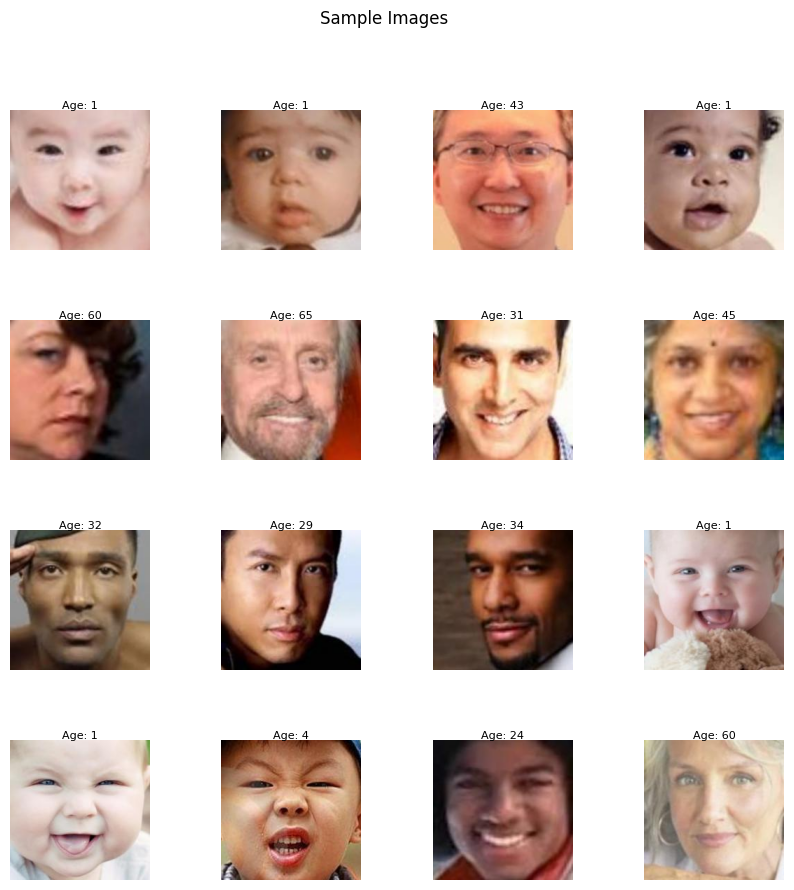

In [17]:
display_random_images(df_images)


### mean faces for each age

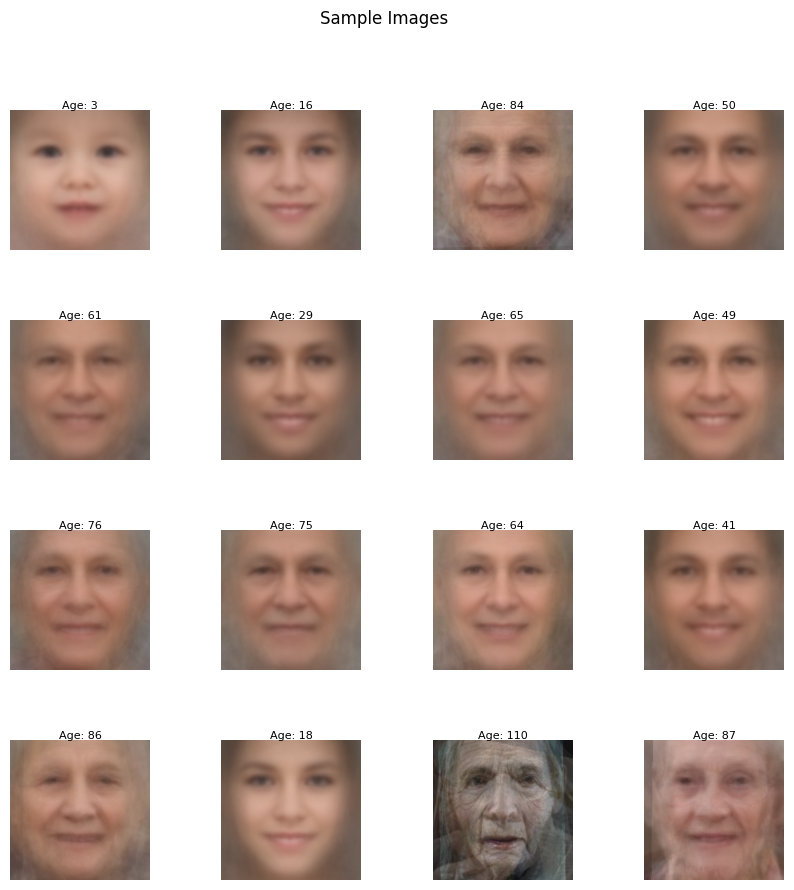

In [10]:
df_mean_faces = generate_average_face_per_age(df_images)
display_random_images(df_mean_faces)

### grayscale images

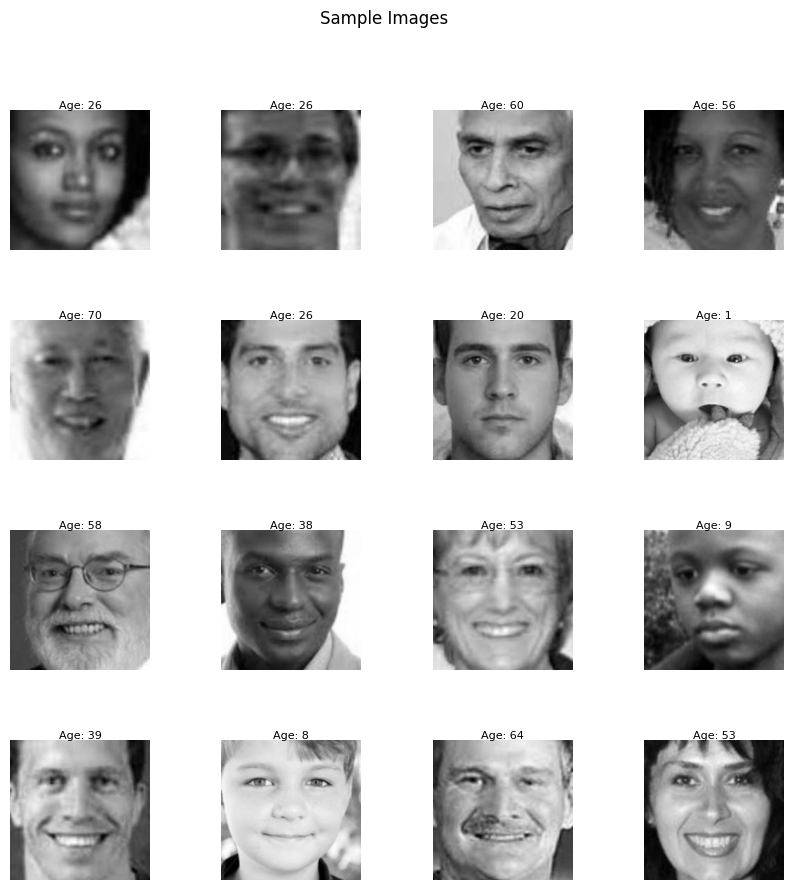

In [11]:
display_random_grayscale_images(df_images)

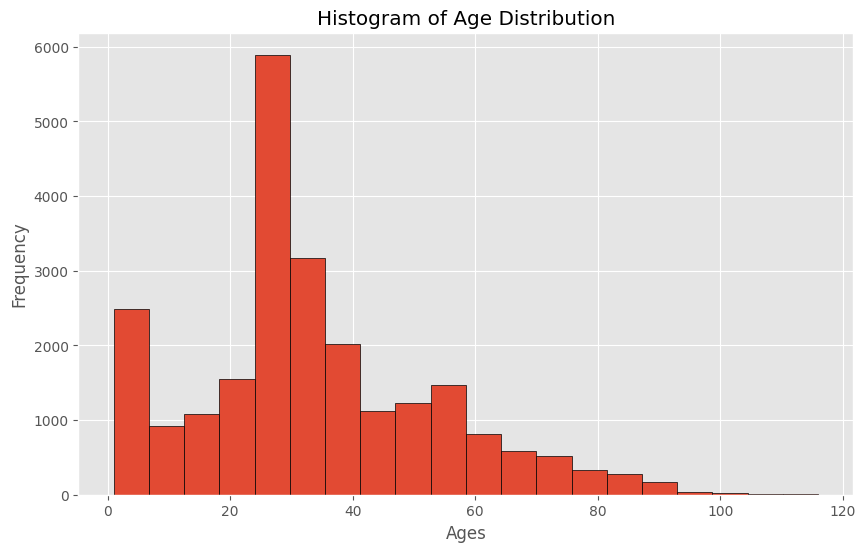

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


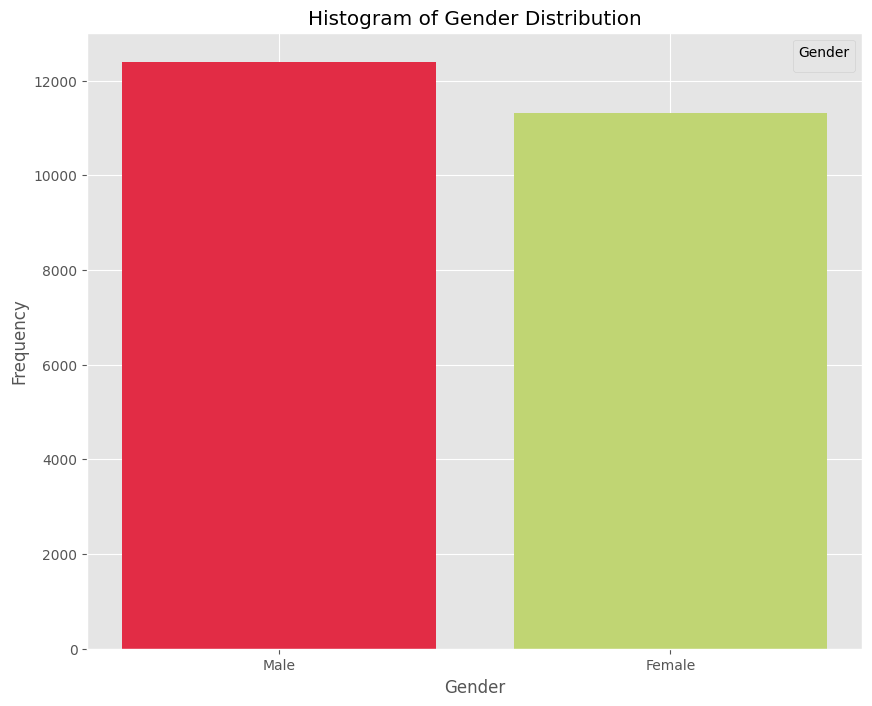

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


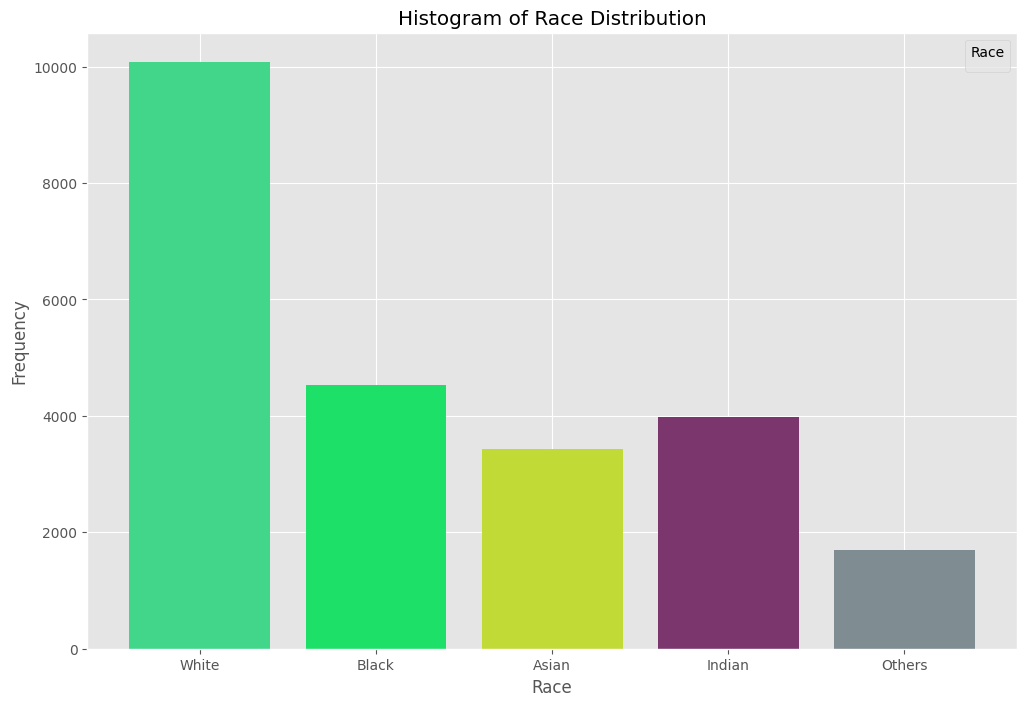

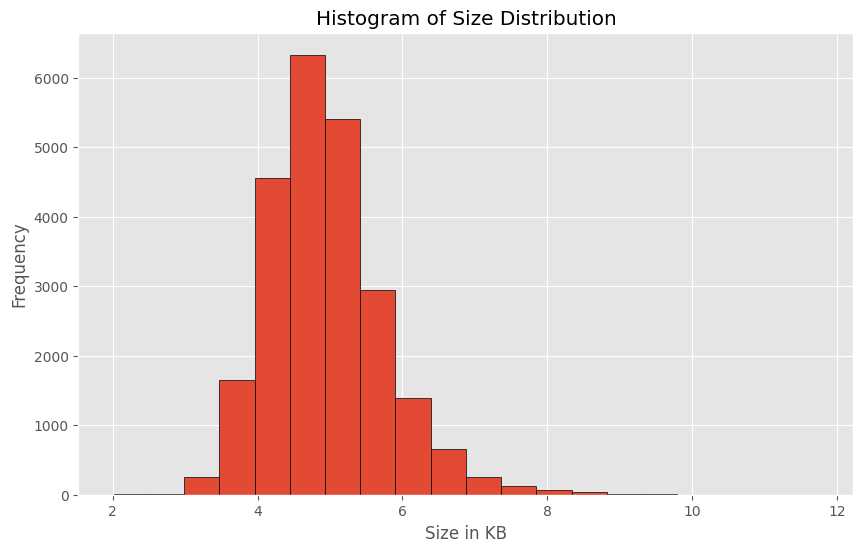

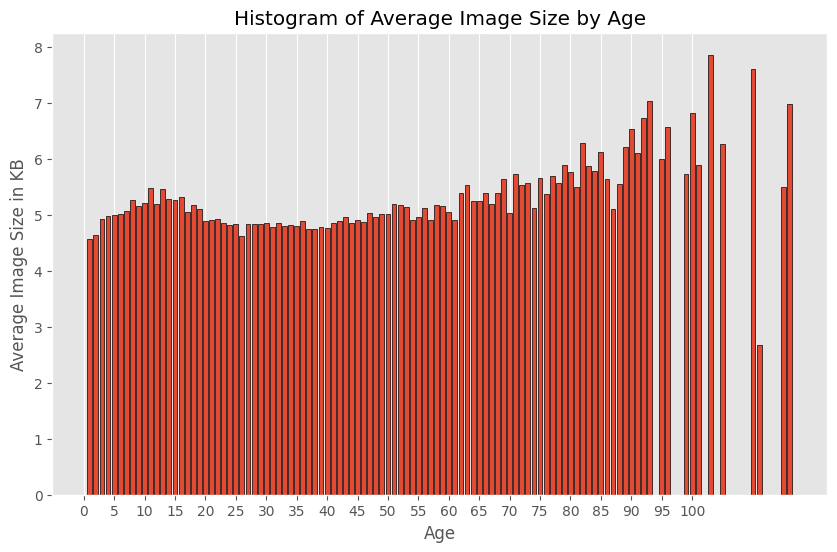

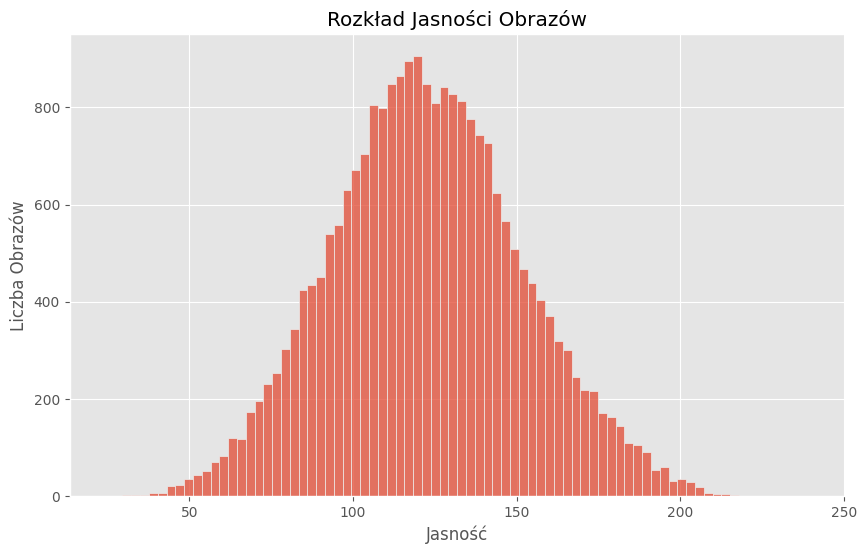

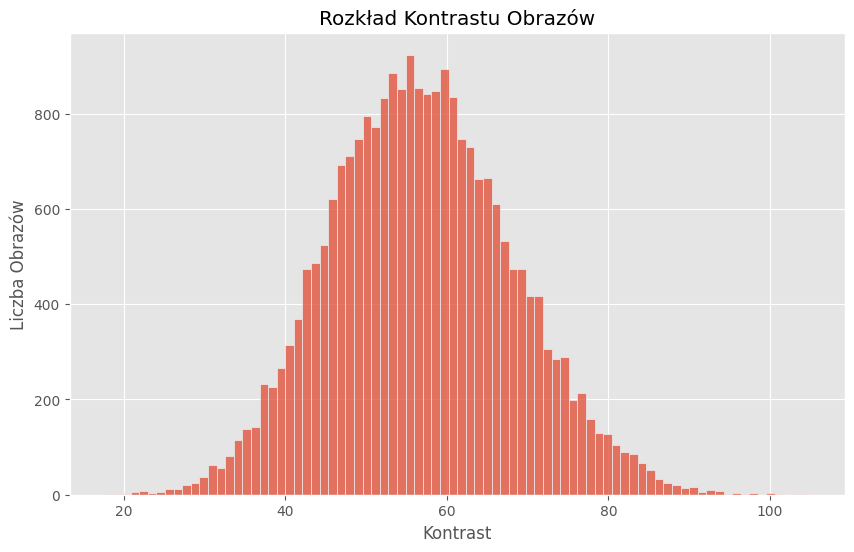

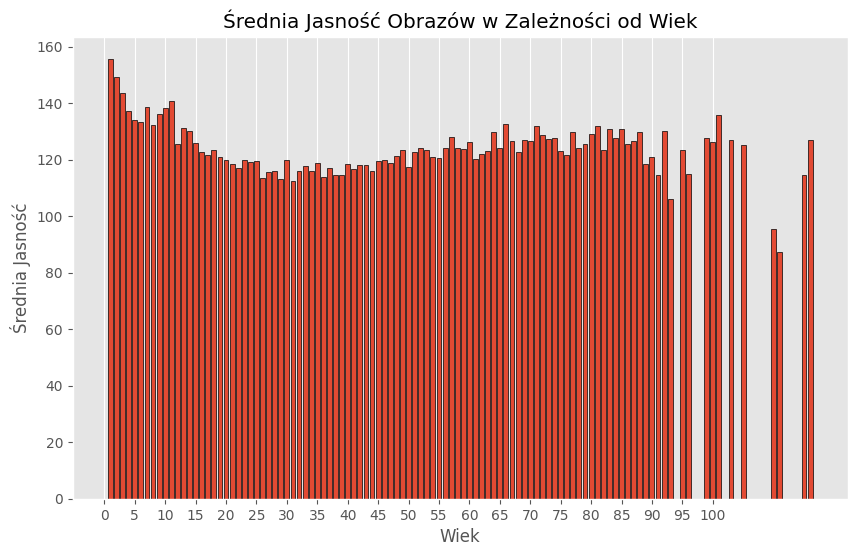

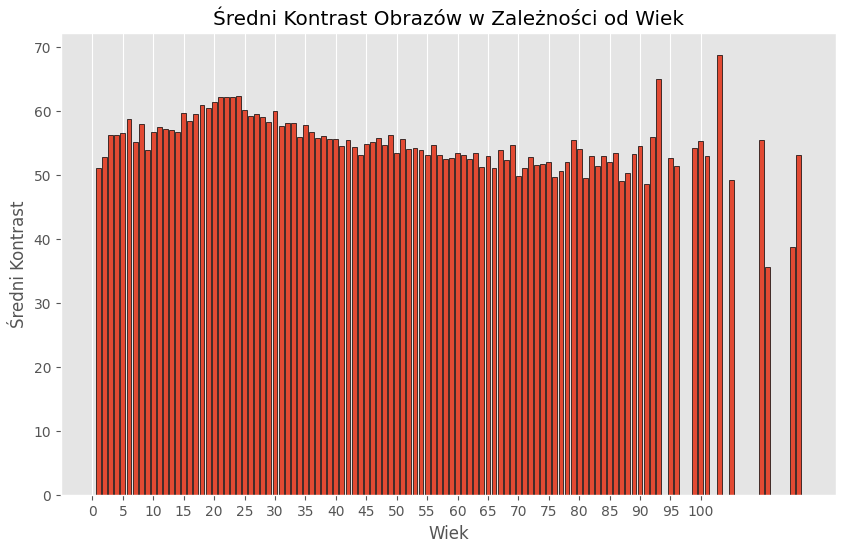

In [21]:

def count_images_per_age(dataframe):
    # Grouping by 'Age' column and counting occurrences of each age
    age_counts = dataframe['Age'].value_counts().sort_index()
    return age_counts

def count_image_per_race(dataframe):
    
    race_counts = dataframe['Race'].value_counts().sort_index()
    return race_counts

def count_image_per_gender(dataframe):
    
    gender_counts = dataframe['Gender'].value_counts().sort_index()
    return gender_counts



















# ilosc osob w danym wieku
plt.figure(figsize=(10, 6))
plt.hist(df_images['Age'], bins=20, edgecolor='black')
plt.title('Histogram of Age Distribution')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 8))
labels=['Male', 'Female']
gender_freq=count_image_per_gender(df_images)
plt.bar(labels,gender_freq,color=np.random.rand(len(labels),3));
plt.title('Histogram of Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.legend(title='Gender')
plt.show()


plt.figure(figsize=(12, 8))
labels=['White', 'Black', 'Asian', 'Indian', 'Others']
races_freq=count_image_per_race(df_images)
plt.bar(labels,races_freq,color=np.random.rand(len(labels),3))
plt.title('Histogram of Race Distribution')
plt.xlabel('Race')
plt.ylabel('Frequency')
plt.legend(title='Race')
plt.show()



plt.figure(figsize=(10, 6))
plt.hist(df_images['Size'], bins=20, edgecolor='black')
plt.title('Histogram of Size Distribution')
plt.xlabel('Size in KB')
plt.ylabel('Frequency')
plt.show()


age_group = df_images.groupby('Age')['Size'].mean()

# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.bar(age_group.index, age_group.values, edgecolor='black')
plt.title('Histogram of Average Image Size by Age')
plt.xlabel('Age')
plt.ylabel('Average Image Size in KB')
plt.xticks(np.arange(0, 101, 5))  # Ustawienie podziałek osi X co 10 lat
plt.grid(axis='y')
plt.show()



def calculate_image_features(image_array):
    """Oblicza jasność i kontrast obrazu."""
    brightness = np.mean(image_array)  # Średnia jasność
    contrast = np.std(image_array)     # Standardowe odchylenie pikseli dla kontrastu
    return brightness, contrast

# Przetwarzanie obrazów i dodawanie cech do DataFrame
brightness = []
contrast = []

for img_array in df_images['Images']:
    img_brightness, img_contrast = calculate_image_features(img_array)
    brightness.append(img_brightness)
    contrast.append(img_contrast)

df_images['Brightness'] = brightness
df_images['Contrast'] = contrast

# Tworzenie wykresów
plt.figure(figsize=(10, 6))
sns.histplot(data=df_images, x='Brightness')
plt.title('Rozkład Jasności Obrazów')
plt.xlabel('Jasność')
plt.ylabel('Liczba Obrazów')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=df_images, x='Contrast')
plt.title('Rozkład Kontrastu Obrazów')
plt.xlabel('Kontrast')
plt.ylabel('Liczba Obrazów')
plt.show()


average_brightness_by_age = df_images.groupby('Age')['Brightness'].mean()


plt.figure(figsize=(10, 6))
plt.bar(average_brightness_by_age.index, average_brightness_by_age.values, edgecolor='black')
plt.title('Średnia Jasność Obrazów w Zależności od Wiek')
plt.xlabel('Wiek')
plt.ylabel('Średnia Jasność')
plt.xticks(np.arange(0, 101, 5))  
plt.grid(axis='y')
plt.show()

# Sredni dla gup wiekowych wanie i obliczanie średniego kontrastu dla każdej grupy wiekowej
average_contrast_by_age = df_images.groupby('Age')['Contrast'].mean()

# wykres
plt.figure(figsize=(10, 6))
plt.bar(average_contrast_by_age.index, average_contrast_by_age.values, edgecolor='black')
plt.title('Średni Kontrast Obrazów w Zależności od Wiek')
plt.xlabel('Wiek')
plt.ylabel('Średni Kontrast')
plt.xticks(np.arange(0, 101, 5))  
plt.grid(axis='y')
plt.show()

# age_counts = count_images_per_age(df_images)
# plt.figure(figsize=(10, 6))
# age_counts.plot(kind='bar')
# plt.title('Distribution of Images per Age')
# plt.xlabel('Age')
# plt.ylabel('Count')

# plt.figure(figsize=(8, 8))
# age_counts.plot(kind='pie', autopct='%1.1f%%')
# plt.title('Distribution of Images per Age')
# plt.ylabel('')
# plt.show()




